In [74]:
from google.colab import drive

In [75]:
import tensorflow
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [76]:
import numpy as np
import pandas as pd
import cv2
import os

In [77]:
drive.mount('/content/drive')#connect drive to colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
Datadir='/content/drive/MyDrive/datasets/petimg'
category=["Dog","Cat"]
dataset=[]
size=50
for types in category:
    path=os.path.join(Datadir,types)
    ex=0
    for img in os.listdir(path):
        if types=='Dog':
            ex=1
        else :
            ex=0
        try :
            img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img=cv2.resize(img_arr ,(size,size),interpolation=cv2.INTER_AREA)
            dataset.append([new_img,ex])
        except Exception as e:
            pass

In [79]:
dataset

[[array([[27, 27, 29, ..., 29, 29, 40],
         [28, 28, 31, ..., 39, 45,  9],
         [29, 30, 30, ..., 26, 34, 12],
         ...,
         [82, 91, 94, ..., 48, 47, 29],
         [90, 98, 91, ..., 75, 42, 27],
         [85, 91, 95, ..., 94, 37, 27]], dtype=uint8), 1],
 [array([[ 92,  93,  93, ...,  37,  38,  22],
         [ 93,  94, 100, ...,  35,  32,  31],
         [ 92,  95,  95, ...,  61,  65,  34],
         ...,
         [107, 156, 164, ...,  69,  68,  65],
         [ 98, 142, 154, ...,  67,  66,  64],
         [ 93,  96, 143, ...,  66,  65,  64]], dtype=uint8), 1],
 [array([[ 73,  71,  84, ...,  66,  68,  63],
         [ 87,  71,  71, ...,  67,  67,  70],
         [ 90,  69,  76, ...,  68,  69,  70],
         ...,
         [ 59, 107, 108, ...,  48,  22,  25],
         [ 52,  51,  82, ...,  19,  25,  31],
         [ 61,  54,  82, ...,  30,  24,  37]], dtype=uint8), 1],
 [array([[35, 40, 73, ..., 79, 47, 41],
         [19, 18, 25, ..., 83, 61, 54],
         [18, 22, 26, ..., 71

In [80]:
import random

In [81]:
random.shuffle(dataset)

In [83]:
X=[]
Y=[]
for features,label in dataset:
  X.append(features)
  Y.append(label)

In [84]:
X=np.array(X).reshape(-1,50,50,1)

In [85]:
X

array([[[[ 93],
         [ 59],
         [ 69],
         ...,
         [101],
         [ 95],
         [ 89]],

        [[ 81],
         [ 76],
         [134],
         ...,
         [106],
         [101],
         [ 93]],

        [[105],
         [ 80],
         [160],
         ...,
         [112],
         [107],
         [101]],

        ...,

        [[141],
         [144],
         [149],
         ...,
         [116],
         [109],
         [ 54]],

        [[138],
         [142],
         [145],
         ...,
         [114],
         [106],
         [ 48]],

        [[132],
         [137],
         [137],
         ...,
         [108],
         [ 96],
         [ 46]]],


       [[[ 51],
         [ 57],
         [ 61],
         ...,
         [ 65],
         [ 58],
         [ 51]],

        [[ 55],
         [ 60],
         [ 64],
         ...,
         [ 69],
         [ 62],
         [ 55]],

        [[ 60],
         [ 64],
         [ 66],
         ...,
         [ 72],
         [

In [156]:
model=Sequential()
model.add(Flatten(input_shape=(50,50)))
model.add(Dense(2500,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.add(Dense(2,activation='softmax'))

In [157]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 2500)              0         
                                                                 
 dense_18 (Dense)            (None, 2500)              6252500   
                                                                 
 dense_19 (Dense)            (None, 10)                25010     
                                                                 
 dense_20 (Dense)            (None, 2)                 22        
                                                                 
Total params: 6,277,532
Trainable params: 6,277,532
Non-trainable params: 0
_________________________________________________________________


In [158]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [159]:
Yt=np.array(Y)
from collections import Counter

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
#Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Yt, test_size = 0.2)
history=model.fit(X_train,y_train,epochs=250,validation_split=0.2)

Epoch 1/250
21/21 [==============================] - 1s 38ms/step - loss: 0.7475 - accuracy: 0.4947 - val_loss: 0.7396 - val_accuracy: 0.4970
Epoch 2/250
21/21 [==============================] - 1s 33ms/step - loss: 0.7358 - accuracy: 0.4947 - val_loss: 0.7295 - val_accuracy: 0.4970
Epoch 3/250
21/21 [==============================] - 1s 38ms/step - loss: 0.7266 - accuracy: 0.4947 - val_loss: 0.7210 - val_accuracy: 0.4970
Epoch 4/250
21/21 [==============================] - 1s 32ms/step - loss: 0.7191 - accuracy: 0.4947 - val_loss: 0.7140 - val_accuracy: 0.4970
Epoch 5/250
21/21 [==============================] - 1s 34ms/step - loss: 0.7127 - accuracy: 0.4947 - val_loss: 0.7091 - val_accuracy: 0.4970
Epoch 6/250
21/21 [==============================] - 1s 34ms/step - loss: 0.7082 - accuracy: 0.4947 - val_loss: 0.7050 - val_accuracy: 0.4970
Epoch 7/250
21/21 [==============================] - 1s 32ms/step - loss: 0.7043 - accuracy: 0.4947 - val_loss: 0.7018 - val_accuracy: 0.4970
Epoch 

In [160]:
y_prob=model.predict(X_test)

In [161]:
y_pred=y_prob.argmax(axis=1)

In [162]:
import matplotlib.pyplot as plt

In [163]:
import sklearn
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5555555555555556

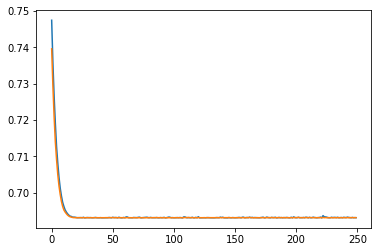

In [164]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

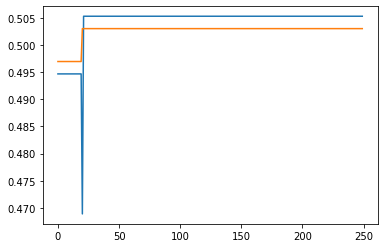

In [165]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])